## Predictions & Model Objects
* In this chapter, you’ll discover how to use linear regression models to make predictions on Taiwanese house prices and Facebook advert clicks. 
* You’ll also grow your regression skills as you get hands-on with model objects, understand the concept of "regression to the mean", and learn how to transform variables in a dataset.

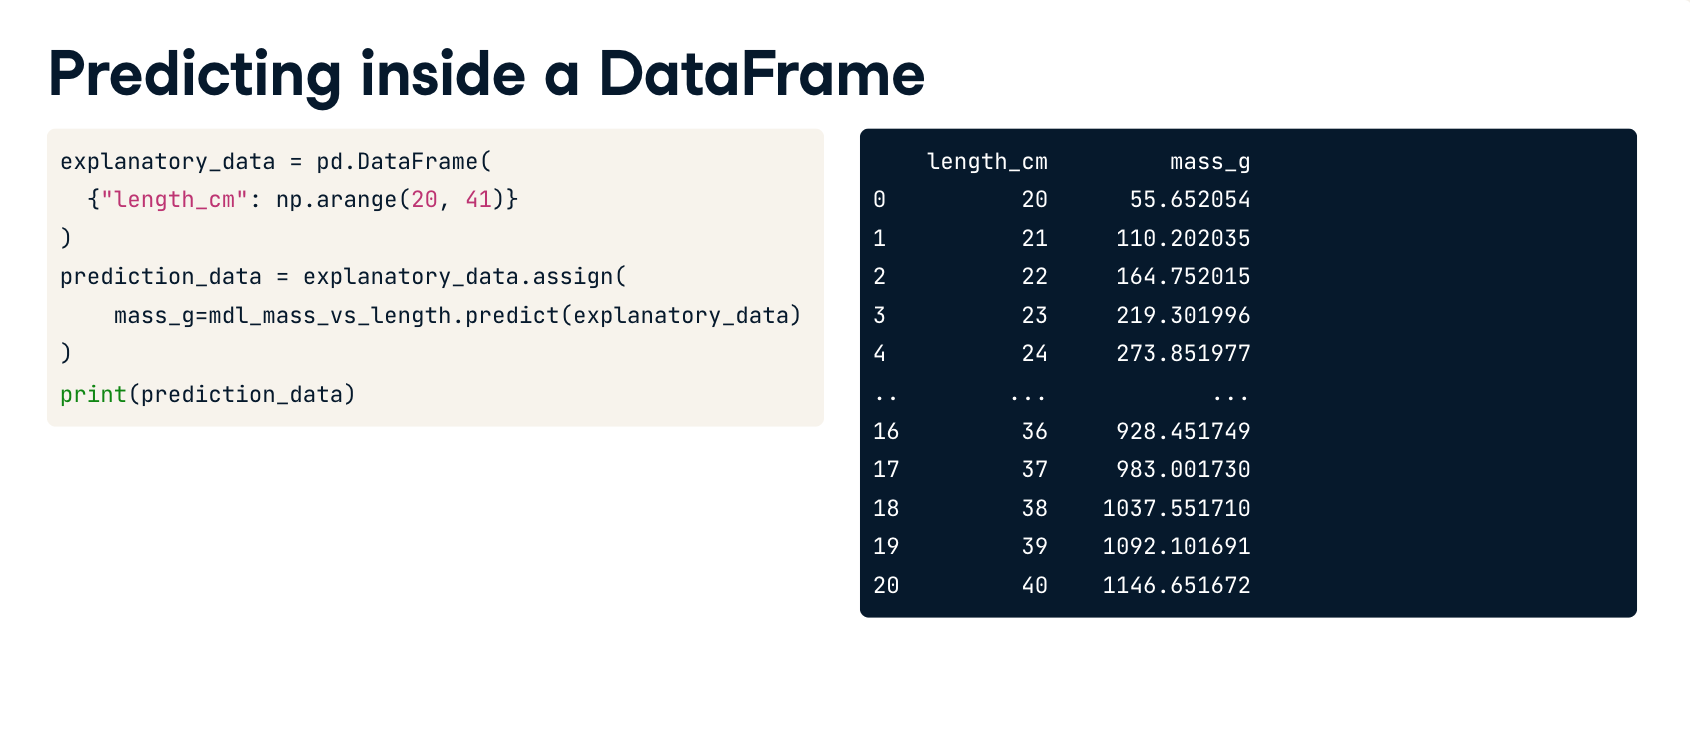
* Having a single column of predictions isn't that helpful to work with. It's easier to work with if the predictions are in a DataFrame alongside the explanatory variables.
* To do this, you can use the pandas assign method. It returns a new object with all original columns in addition to new ones. You start with the existing column, explanatory_data. 
* Then, you use dot assign to add a new column, named after the response variable, mass_g. You calculate it with the same predict code from the previous slide. The resulting DataFrame contains both the explanatory variable and the predicted response.
* Now we can answer questions like "how heavy would we expect a bream with length twenty three centimeters to be?", even though the original dataset didn't include a bream of that exact length. Looking at the prediction data, you can see that the predicted mass is two hundred and nineteen grams.


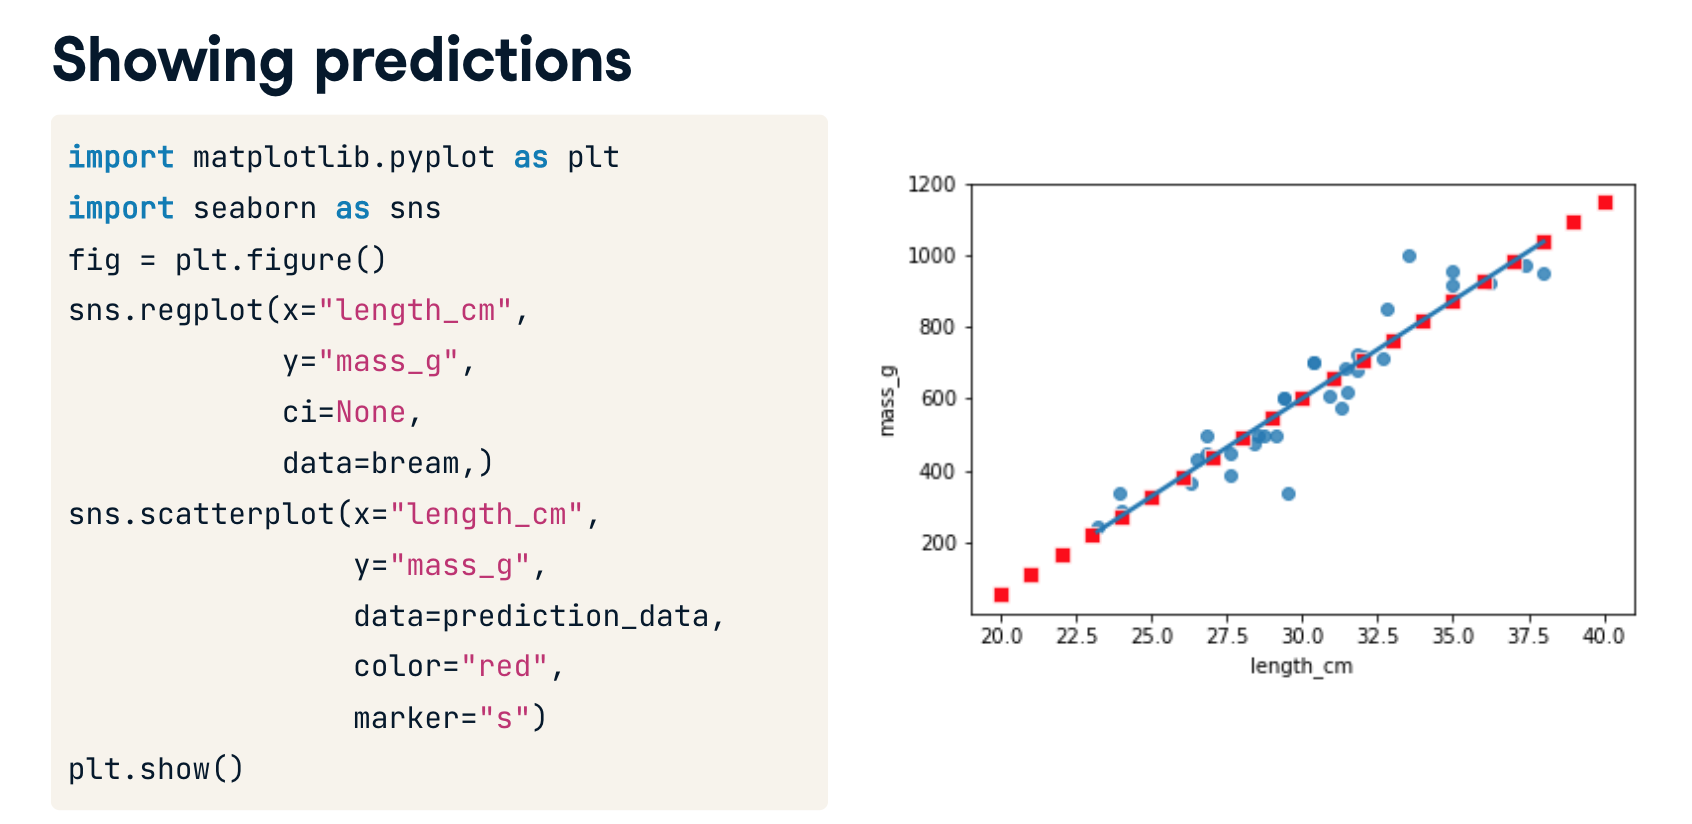
* Let's include the predictions we just made on the scatter plot. To plot multiple layers, we set a matplotlib figure object called fig before calling regplot and scatterplot. As a result, the plt dot show call will then plot both graphs on the same figure. I've marked the prediction points in red squares to distinguish them from the actual data points. 
    * Notice that the predictions lie exactly on the trend line.

#### Extrapolating
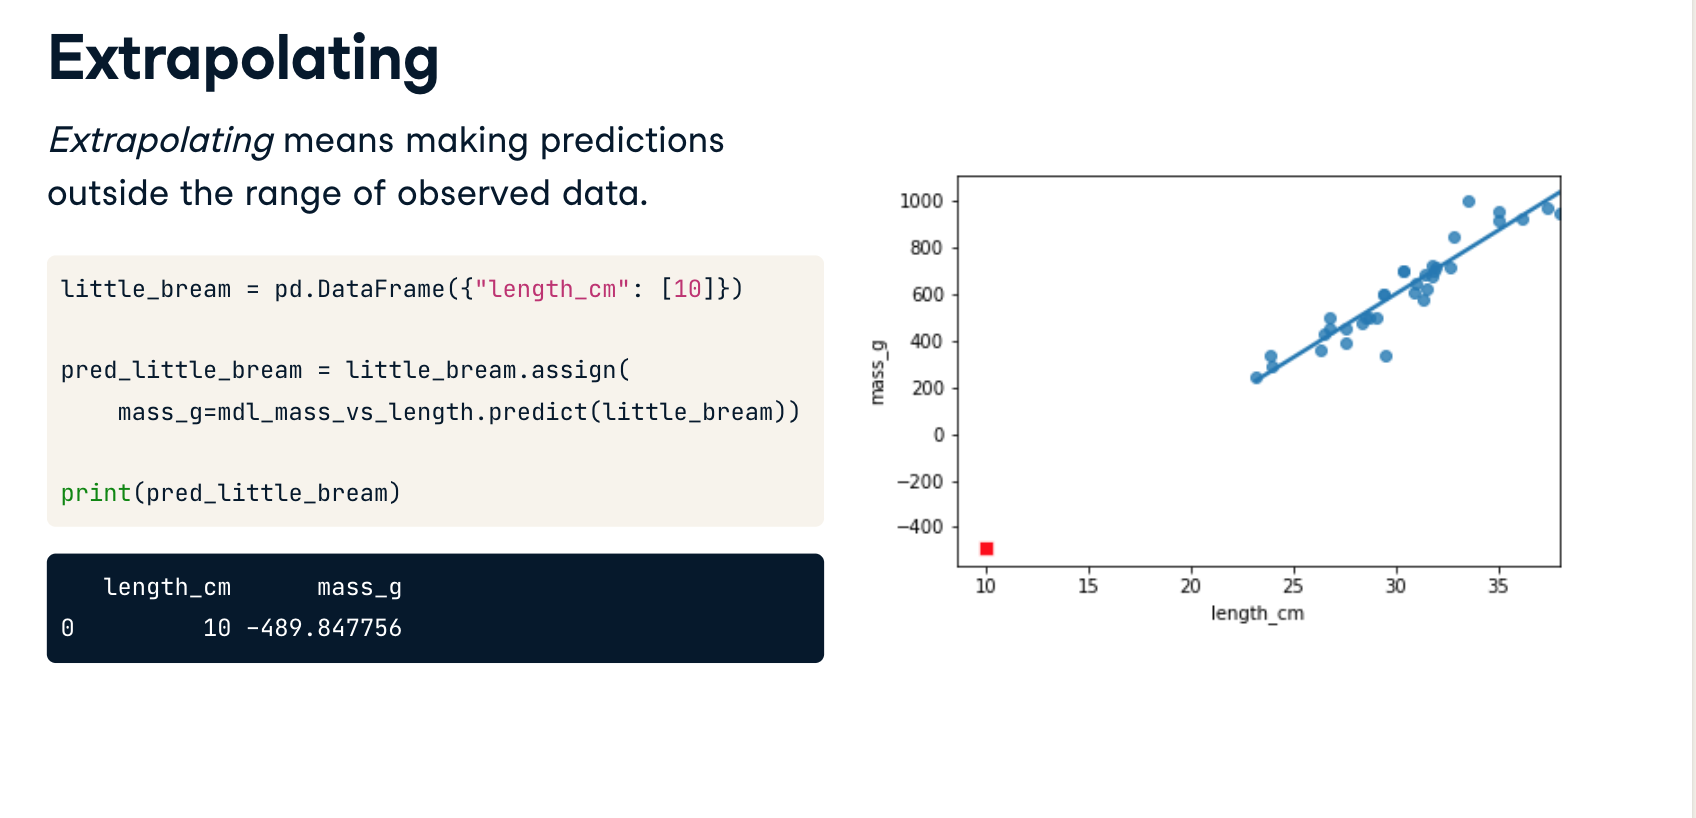

### Predicting House Prices
* Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. 
* That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable.

In [4]:
# Bring in Data Set and Fit Linear Regression Model of House Price vs # of convenience stores

import pandas as pd
from statsmodels.formula.api import ols

taiwan_real_estate = pd.read_csv('../Datasets/taiwan_real_estate2.csv')

display(taiwan_real_estate.head(2))

# Data is in now create model instance and fit

mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

mdl_price_vs_conv = mdl_price_vs_conv.fit()

mdl_price_vs_conv.params

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533


Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [5]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data dataframe by assigning new column (of predicted n_convenience)
prediction_data = explanatory_data.assign(
    price_twd_msq= price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


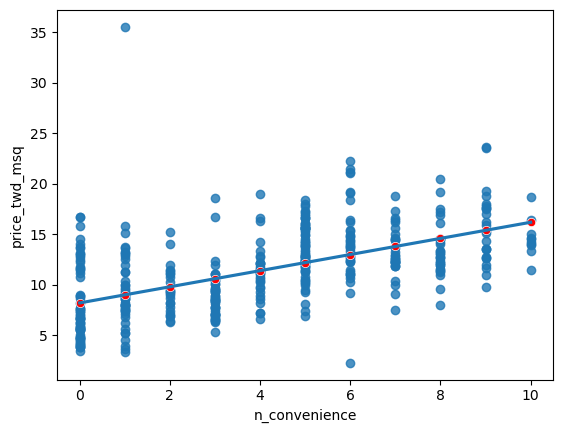

In [8]:
## Visualizing Predictions
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# Add a scatter plot layer to the regplot and use the dataframe above (prediction_data) to show trendline
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color="red")

# Show the layered plot
plt.show()

### Working w/Model Objects

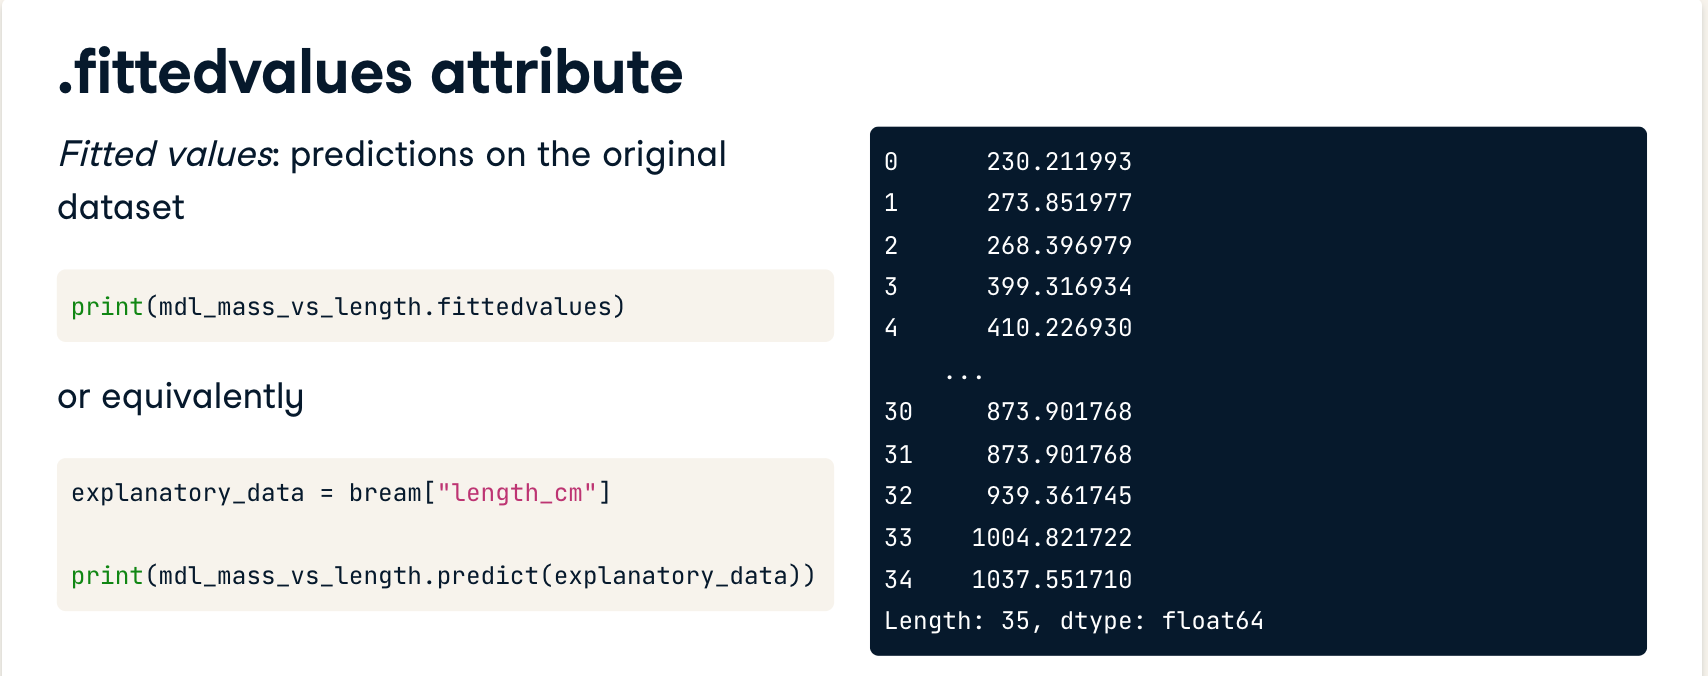
* `"Fitted values"` is jargon for predictions on the original dataset used to create the model. Access them with the fittedvalues attribute. 

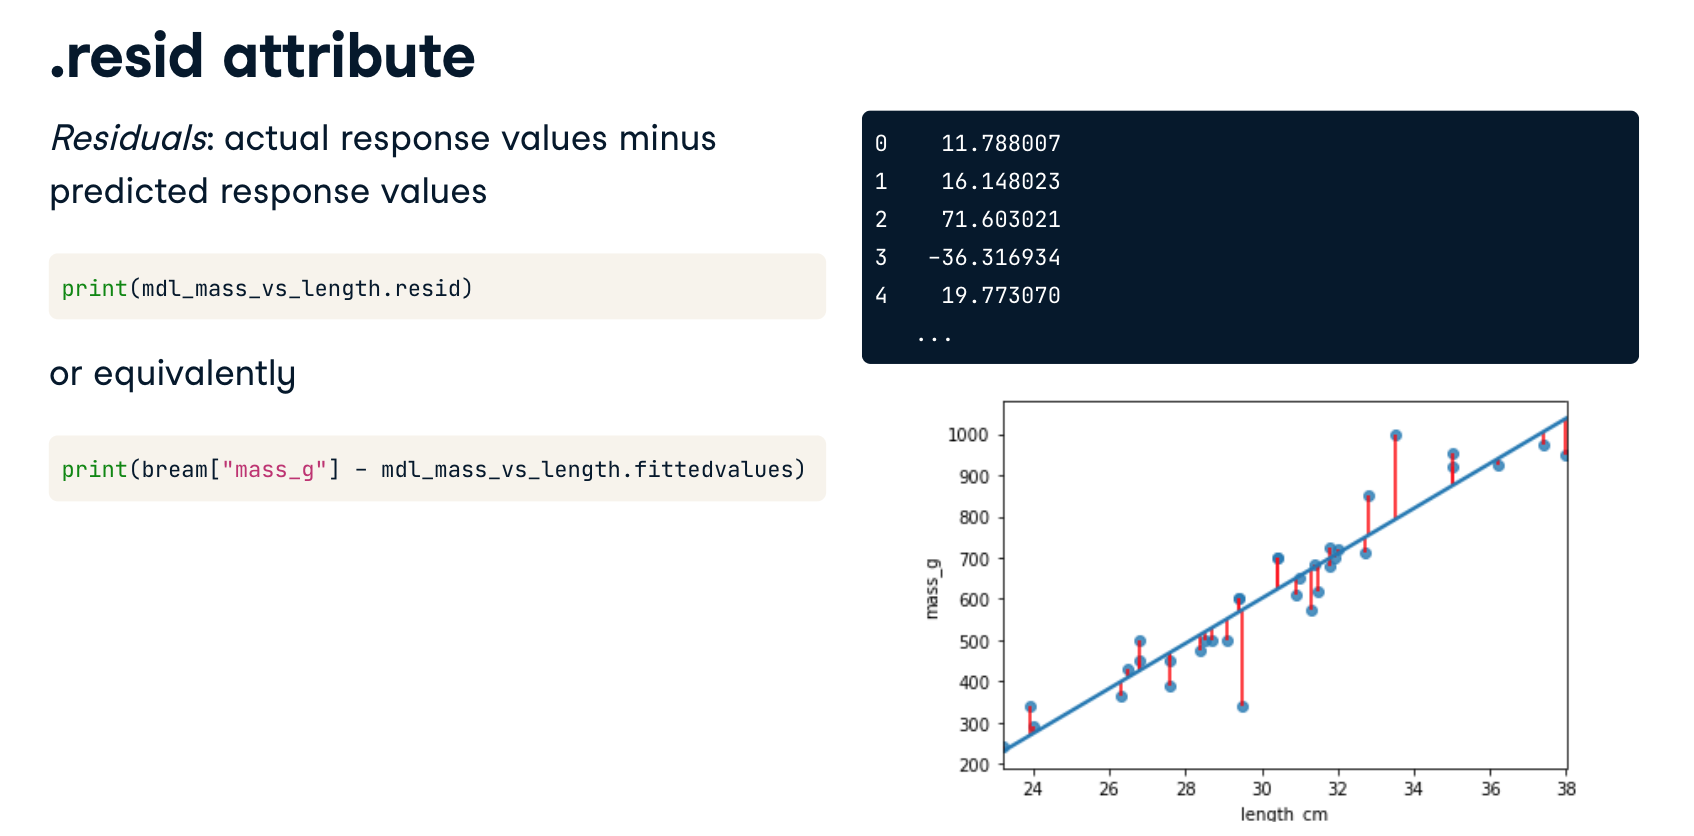
* `"Residuals"` are a measure of inaccuracy in the model fit, and are accessed with the resid attribute. Like fitted values, there is one residual for each row of the dataset. Each residual is the actual response value minus the predicted response value. In this case, the residuals are the masses of breams, minus the fitted values. I illustrated the residuals as red lines on the regression plot.

In [11]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params, '\n')

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues, '\n')

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid, '\n')

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64 

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64 

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64 

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           3.41e-37
Time:                        19:33:55   Log-Likelihood:                -1091.1
No. Observations:                 

In [12]:
# Manually Predicting House Prices

# SLR : predicted value is just the intercept plus the slope times the explanatory variable

# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions (explanatory_data is simply the single column dataframe of generating n_occurences manually for descriptive variable)
price_twd_msq = intercept + (slope * explanatory_data)
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


### Regression to the Mean
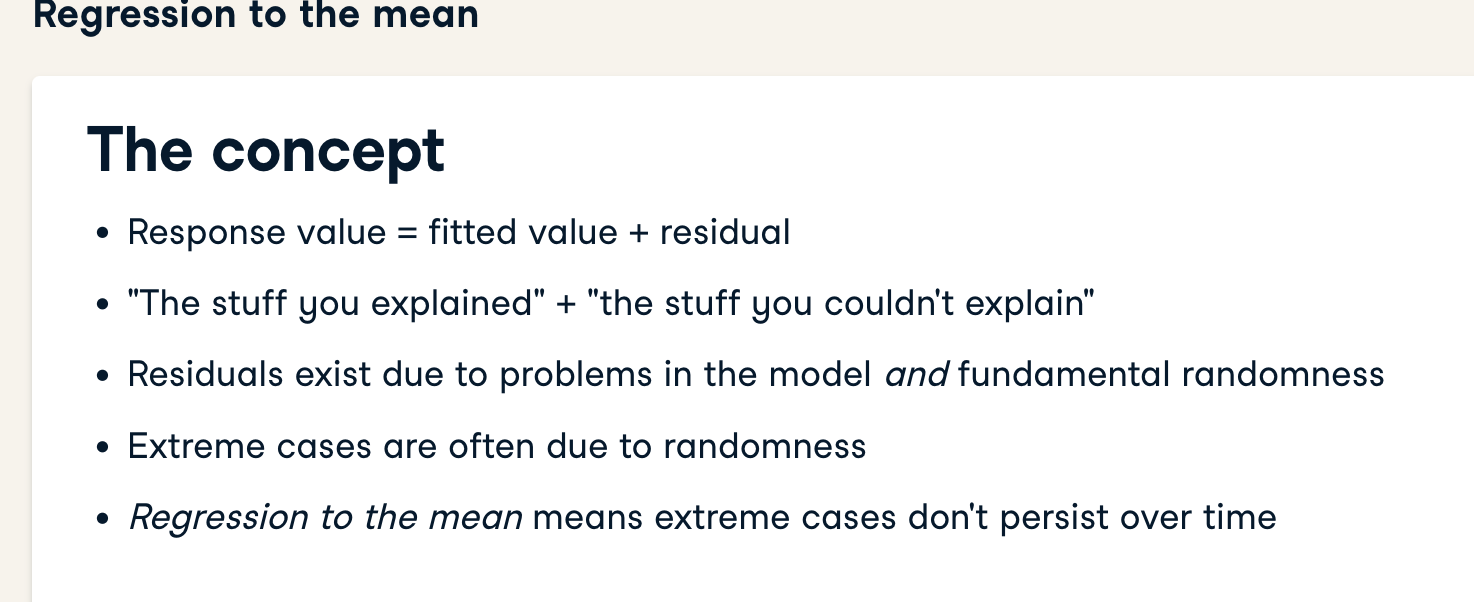

#### Plotting consecutive portfolio returns
* Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

|variable|meaning|
|-----|-----|
|symbol|Stock ticker symbol uniquely identifying the company|
|return_2018|A measure of investment performance in 2018|
|return_2019|A measure of investment performance in 2019|

In [13]:
sp500_yearly_returns = pd.read_csv('../Datasets/sp500_yearly_returns.csv')
sp500_yearly_returns.head(3)

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278


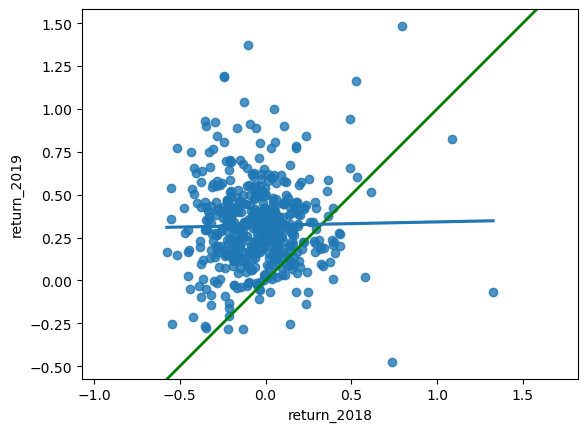

In [14]:
# Create a new figure to enable plot layering
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019', data=sp500_yearly_returns, ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

#### Modeling Consecutive Returns
* Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. 
* By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [15]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64
